<a href="https://colab.research.google.com/github/krishroop/Fashion-Classification-using-Deep-Learning/blob/main/Prediction_using_unmodified_InceptionNet_on_Apparel_classification_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4769927620755955559, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16388346900468925210
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

#1.Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
image_path = "sample_data/testImage.jpg"

#2. Loading Image and opening it

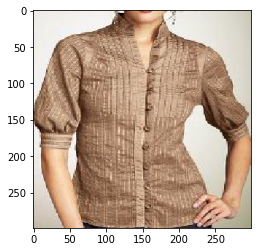

In [10]:
from keras.preprocessing import image

img = image.load_img(image_path, target_size=(299, 299))

plt.imshow(img)
plt.show()

#3.Preprocessing the Image

In [11]:
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

testImage=image.img_to_array(img)
testImage=np.expand_dims(testImage,axis=0)
ProcessedTestImage=preprocess_input(testImage)

#4.Importing InceptionNet model and printing its details

In [7]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3()

model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

#5.Using InceptionNet to predict labels for testImage

[[('n06359193', 'web_site', 0.999863),
  ('n01740131', 'night_snake', 9.482053e-05),
  ('n04141076', 'sax', 1.3631692e-05),
  ('n03110669', 'cornet', 1.2573441e-05),
  ('n01665541', 'leatherback_turtle', 1.1562537e-05),
  ('n04286575', 'spotlight', 3.7562195e-06),
  ('n04409515', 'tennis_ball', 3.4183148e-07),
  ('n02447366', 'badger', 1.3694144e-07),
  ('n03584829', 'iron', 4.894387e-08),
  ('n10148035', 'groom', 4.4207912e-08)]]

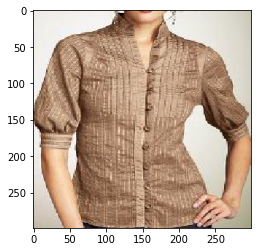

In [12]:
feature = model.predict(ProcessedTestImage)
plt.imshow(img)
decode_predictions(feature,10)